## Time Series Forecasting
It is a method of using statistical models to predict the future values of time series based on past results.

In this example, we will use the powerful ARIMA models to forecast time-series data. It is a class of models that captures a suite of different standard temporal structures in time series data. Prior to the implemetation of ARIMA, one need to ensure that the series is stationary, which involves checking if its statistical properties such as mean, variance, and autocorrelation are constant over time.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose 

In [2]:
df_air = pd.read_csv("Dataset/AirPassengers_time_series.csv",index_col ='Month',  parse_dates = True)

In [3]:
df_air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
print ("Shape of data", df_air.shape)

Shape of data (144, 1)


## ETS Decomposition
ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.

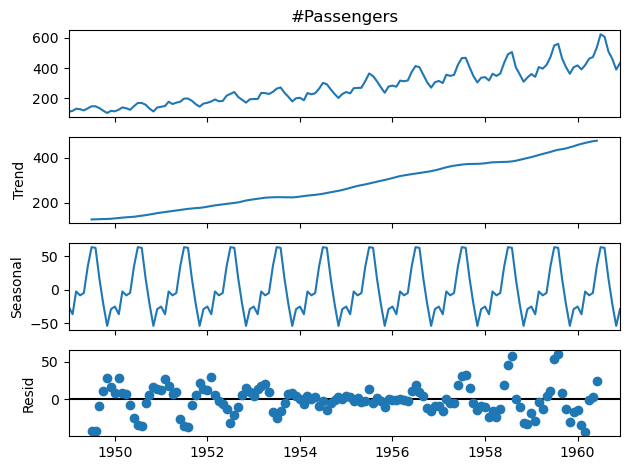

In [5]:
res = seasonal_decompose(df_air['#Passengers']).plot()


## ARIMA Model for Time Series Forecasting
ARIMA stands for Auto-Regressive Integrated Moving Average model. ARIMA is specified by three order parameters: (p, d, q).
<ol>
<li> AR(p) Autoregression: A regression model that utilizes the dependent relationship between a current observation and observations over a previous period. It uses the past values in the regression equation for the time series.</li>
<li> I(d) Integration: It refers to differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.</li>
<li> MA(q) Moving Average: A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.</li>
</ol>

(p,d,q) are also defined as following:
-  p: The number of lag observations included in the model, also called the lag order.
-  d: The number of times that the raw observations are differenced, also called the degree of difference.
-  q: The size of the moving average window, also called the order of moving average.

In [6]:
from pmdarima import auto_arima

In [7]:
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_air['#Passengers'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.48 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.66 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.22 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.22 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [8]:
# To print the summary 
stepwise_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 24 Jul 2024   AIC                           1019.178
Time:                                     11:12:18   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train-test splitting of dataset
 
-  Train: Data on which model is trained or learned </li>
-  Test: Data on which model is validated or tested how it has learned </li>


In [9]:
## Split data into train / test sets 
train = df_air.iloc[:len(df_air)-12] 
test = df_air.iloc[len(df_air)-12:]                                     # set one year(12 months) for testing 

In [10]:
print (type(train[:10]))
print (f"Train data: \n {train}")
print (f"Test data: \n {test}")
print (f"\n Shape of train/test {train.shape, test.shape}")

<class 'pandas.core.frame.DataFrame'>
Train data: 
             #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1959-08-01          559
1959-09-01          463
1959-10-01          407
1959-11-01          362
1959-12-01          405

[132 rows x 1 columns]
Test data: 
             #Passengers
Month                  
1960-01-01          417
1960-02-01          391
1960-03-01          419
1960-04-01          461
1960-05-01          472
1960-06-01          535
1960-07-01          622
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

 Shape of train/test ((132, 1), (12, 1))


## Fitting a SARIMAX model on train data

In [11]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['#Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.015
Date:                            Wed, 24 Jul 2024   AIC                            896.031
Time:                                    11:12:20   BIC                            909.926
Sample:                                01-01-1949   HQIC                           901.673
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2970      0.076     -3.926      0.000      -0.445      -0.149
ar.S.L12       0.7120      0.231      3.088      0.002       0.260       1.164
ar.S.L24       0.2870      0.099      2.887      0.004       0.092       0.482
ma.S.L12      -0.9783      1.992     -0.491      0.623      -4.883       2.927
sigma2        88.4391    157.474      0.562      0.574    -220.205     397.083
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.84   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set and plotting actual vs. predictions

Text(0.5, 1.0, 'Predictions on test data')

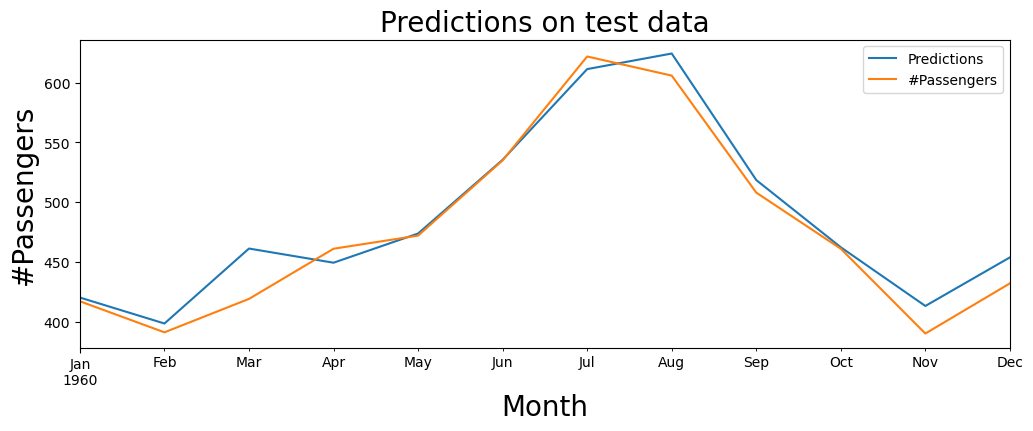

In [12]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
fig = plt.figure(figsize=(12,4))
predictions.plot(legend = True)             ## model predictions
test['#Passengers'].plot(legend = True)     ## test data value (has data for 1 year or 12 months)
plt.ylabel('#Passengers',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.title("Predictions on test data", fontsize=20)

##  Evaluate the model using MSE and RMSE
Evaluates the test performance using the trained ARIMA model

In [13]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
print (f"RMSE: {rmse(test["#Passengers"], predictions)}") 
  
# Calculate mean squared error 
print (f"MSE: {mean_squared_error(test["#Passengers"], predictions) }")

RMSE: 17.209825016738836
MSE: 296.17807710676993


## Forecasting using ARIMA model on total dataset 
-  The SARIMAX model is trained on total database df_air using the parameters obtained from above models.
-  The forecast of models is done for 3 years (i.e. 3*12 = 36 months)
-  The actual (blue) and forecast (orange) results are shown in figure below
-  The trend of the database is capture by the time-forecast models trained using ARIMA

Text(0.5, 1.0, 'Forecast plot')

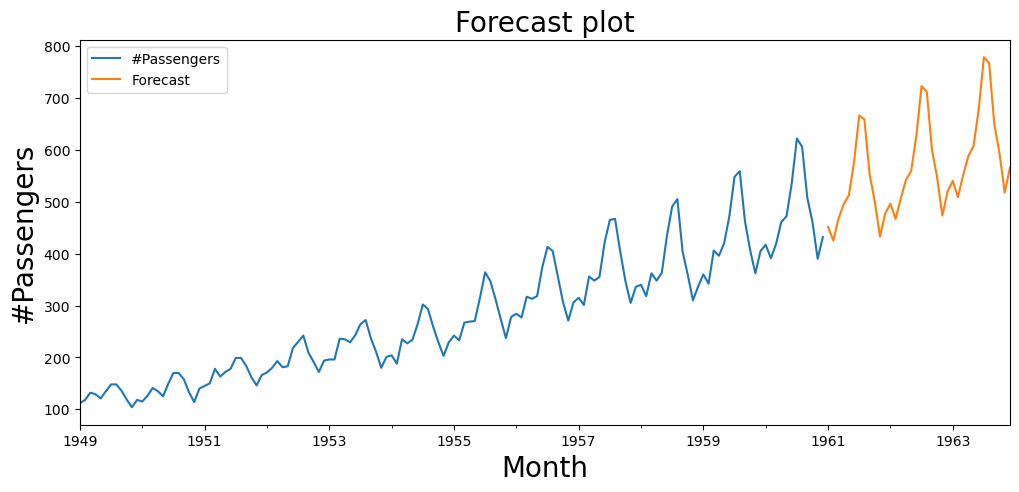

In [14]:
import warnings
warnings.filterwarnings('ignore')
## Forecast using ARIMA Model

# Train the model on the full dataset 
model = SARIMAX(df_air['#Passengers'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(df_air),  
                          end = (len(df_air)-1) + 3 * 12,     ## for next 3 years = 3*12=36 months
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df_air['#Passengers'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 
plt.ylabel('#Passengers',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.title("Forecast plot",fontsize=20)